# Import the necessary packages

In [82]:
import kaggle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import random 
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import datetime
from sklearn.metrics import classification_report


# Obtain Input Data

In [45]:
#Call Kaggle API
#api = KaggleApi()
#api.authenticate()

In [83]:
DIRECTORY = r'C:\Users\Aaron\.kaggle\train'
CATEGORIES = ['cat','dog']

data = []

#Convert images into an array of pixel values
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [84]:
# The image is 60 x 60 with 3 (RBG) values per pixel, totaling 10,800 pixel values per image
data[3][0].shape

(60, 60, 3)

In [159]:
#Image in the form of array with label. 0 = Cat, 1 = Dog
data[3]

[array([[[217, 222, 221],
         [219, 224, 223],
         [236, 234, 235],
         ...,
         [248, 244, 242],
         [245, 240, 240],
         [242, 237, 236]],
 
        [[218, 223, 222],
         [215, 220, 219],
         [230, 235, 234],
         ...,
         [244, 239, 238],
         [255, 252, 251],
         [250, 245, 244]],
 
        [[220, 225, 224],
         [221, 226, 225],
         [226, 228, 228],
         ...,
         [254, 250, 249],
         [248, 243, 242],
         [251, 246, 245]],
 
        ...,
 
        [[212, 208, 207],
         [206, 197, 204],
         [183, 175, 185],
         ...,
         [221, 222, 217],
         [209, 214, 212],
         [208, 213, 216]],
 
        [[201, 202, 192],
         [200, 201, 202],
         [181, 175, 187],
         ...,
         [221, 222, 218],
         [209, 214, 214],
         [209, 214, 217]],
 
        [[214, 210, 213],
         [203, 203, 209],
         [202, 185, 208],
         ...,
         [218, 219, 215],
  

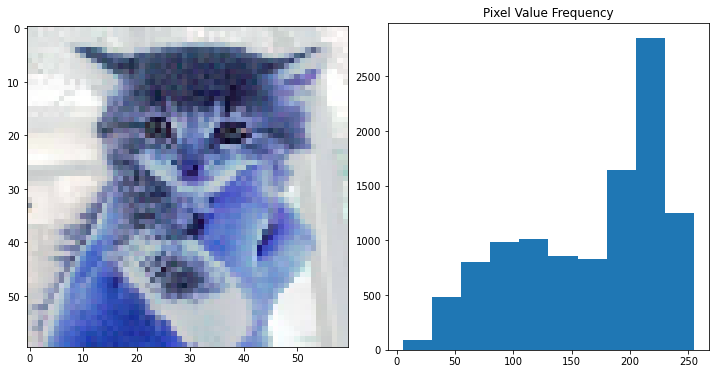

In [127]:
#Plot image with pixel value frequency

plt.figure(figsize=(10,10))

# Negative Cat
plt.subplot(2, 2, 1) 
plt.imshow(data[3][0],cmap=plt.cm.binary)

# Pixel value frequency graph
plt.subplot(2, 2, 2)
plt.hist(data[3][0].reshape(10800,1));
plt.title('Pixel Value Frequency')

plt.tight_layout()

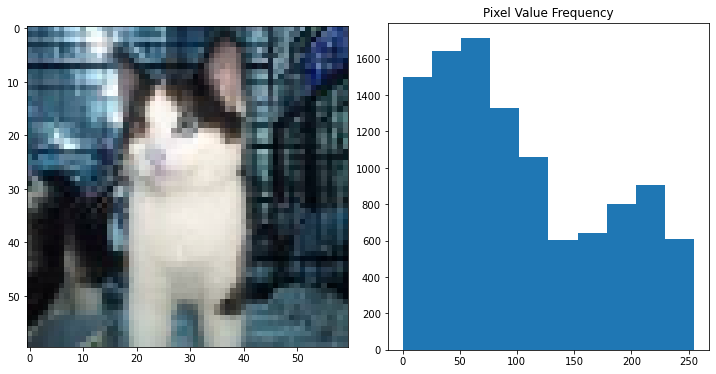

In [153]:
plt.figure(figsize=(10,10))

# Cat in Normal Color
plt.subplot(2, 2, 1) 
plt.imshow(data[4][0],cmap=plt.cm.binary)

# Pixel value frequency graph
plt.subplot(2, 2, 2)
plt.hist(data[4][0].reshape(10800,1));
plt.title('Pixel Value Frequency')


plt.tight_layout()

# Training Data Prep

In [50]:
#Mix the data up, between cats and dog

random.shuffle(data) ##lookup

X = []
y = []


for features, label in data:
    X.append(features)
    y.append(label)
    

X = np.array(X)
y = np.array(y)

In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.45) #,random_state = 2) 

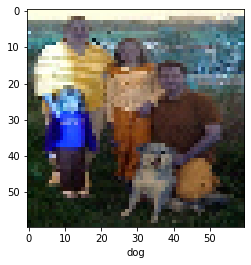

In [55]:
#What does Image look like?
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.xlabel(CATEGORIES[y_train[0]])
plt.show()


In [56]:
# Normalizing Data
X_train = X_train/255
X_test = X_test/255

# ANN and CNN Model Training & Review

In [59]:
#Test on ANN first
begin_time = datetime.datetime.now()

modelANN = models.Sequential([
    layers.Flatten(input_shape =(60,60,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])

modelANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelANN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 4s 8ms/step - loss: 0.7696 - accuracy: 0.5448
Epoch 2/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6792 - accuracy: 0.5765
Epoch 3/10
430/430 [==============================] - 3s 8ms/step - loss: 0.6682 - accuracy: 0.5913
Epoch 4/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6644 - accuracy: 0.5954
Epoch 5/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6601 - accuracy: 0.6066
Epoch 6/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6469 - accuracy: 0.6204
Epoch 7/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6408 - accuracy: 0.6303
Epoch 8/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6513 - accuracy: 0.6147
Epoch 9/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6407 - accuracy: 0.6295
Epoch 10/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6339 - accuracy: 0.6371

In [156]:
modelANN.evaluate(X_test,y_test);

352/352 [==============================] - 2s 6ms/step - loss: 0.6531 - accuracy: 0.6190


In [62]:

y_pred = modelANN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

352/352 [==============================] - 1s 3ms/step - loss: 0.6531 - accuracy: 0.6190
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      5664
           1       0.59      0.76      0.66      5586

    accuracy                           0.62     11250
   macro avg       0.63      0.62      0.61     11250
weighted avg       0.63      0.62      0.61     11250



In [63]:
# Now adding Convolution and Pooling Layers onto ANN 

begin_time = datetime.datetime.now()

modelCNN = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 19s 42ms/step - loss: 0.6131 - accuracy: 0.6585
Epoch 2/10
430/430 [==============================] - 16s 38ms/step - loss: 0.5082 - accuracy: 0.7532
Epoch 3/10
430/430 [==============================] - 16s 38ms/step - loss: 0.4368 - accuracy: 0.7917
Epoch 4/10
430/430 [==============================] - 16s 38ms/step - loss: 0.3616 - accuracy: 0.8356
Epoch 5/10
430/430 [==============================] - 16s 38ms/step - loss: 0.2746 - accuracy: 0.8841
Epoch 6/10
430/430 [==============================] - 16s 38ms/step - loss: 0.1865 - accuracy: 0.9245
Epoch 7/10
430/430 [==============================] - 17s 38ms/step - loss: 0.1137 - accuracy: 0.9568
Epoch 8/10
430/430 [==============================] - 16s 38ms/step - loss: 0.0778 - accuracy: 0.9739
Epoch 9/10
430/430 [==============================] - 16s 38ms/step - loss: 0.0704 - accuracy: 0.9745
Epoch 10/10
430/430 [==============================] - 16s 38ms/step - loss: 0.034

In [154]:
modelCNN.evaluate(X_test,y_test);

352/352 [==============================] - 7s 20ms/step - loss: 1.3917 - accuracy: 0.7252


In [65]:
y_pred = modelCNN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      5664
           1       0.71      0.75      0.73      5586

    accuracy                           0.73     11250
   macro avg       0.73      0.73      0.73     11250
weighted avg       0.73      0.73      0.73     11250

